# Agility - Solution

## Preliminaries
***
### Assumptions:
None of the chains, arms or legs, touching the gorund by default. Because that would create closed loops. 
The base is attaching to the world/ground by a 6 dof joint. Its a virtual joint to represnt 
the floating base.


### Preliminaries 1 and 2:

r + 3 dof for base    
7 dof for left arm    
7 dof for right arm   
6 dof for left leg    
6 dof for right leg       
`q_robot` = 29 + r  

**Euler Angles**:   
The minimal representation of the oriention is Euler Angles but they suffer from Gimbal Lock. 
Its 3 element for orientation. This is the min set of coordinate we can describe an orientation with. Thus:  
r = 3           
`q_robot` = 29 + 3 = 32-D (32 dimension space)       

**Quaternion**:     
Quaternion is not the minimal represntation of orientation. We can think of it as a sphere in 4D,
a 4-element vector whose norm is one. So we have 4 elements with one constraint which means 3 dof but
represented in 4D space.        
r = 4       
`q_robot` = 29 + 4 = 33-D  with one constraint      

There is another representation like axis-angle as well.       

**Rotation Matrix**:            
9 elements but because of orthonormality there are 6 constraints resulting in 3 dof but representd in 9D.
This is the singularity-free represantion where each orientation can be fully defined with one unique rotation
matrix.     
r = 9       
`q_robot` = 29 + 9 = 38-D with 6 constraints.       

To fully determine the configuration of the robot, we need minimum of 32 values, or maximum of 38 values
with respecting the constraints.

### Preliminaries 3:

Minimum set of coordinates that we can use to define the C-Space is the dof of the robot. Hence, the 
answer is 32

### Preliminaries 4:

Assumptions:
-   6 joints  to represent the floating base 
-   Task space is 6D. 
For each serial chain attached to the base, we have one Jacobian. The first 6 columns 
are the same for all of them as they represent the base, we call it $J^{b}_{6\times6}$.

superscripts:       
$b$: base   
$la$: left arm      
$ra$: right arm     
$ll$: left leg      
$rl$: right leg     

**Left Arm**:   
$V^{la}_{6\times1} = [J^{b}_{6\times6} \space | \space J^{la}_{6\times7} ] \space 
\left[
  \begin{array}{c}
  \dot{q}^{b}_{6\times1}  \\
  \\
  \hline
  \\
  \dot{q}^{la}_{7\times1} 
\end{array} \right]$

**Right Arm**:  
$V^{ra}_{6\times1} = [J^{b}_{6\times6} \space | \space J^{ra}_{6\times7} ] \space 
\left[
  \begin{array}{c}
  \dot{q}^{b}_{6\times1}  \\
  \\
  \hline
  \\
  \dot{q}^{ra}_{7\times1} 
\end{array} \right]$

**Left Leg**:   
$V^{ll}_{6\times1} = [J^{b}_{6\times6} \space | \space J^{ll}_{6\times6} ] \space 
\left[
  \begin{array}{c}
  \dot{q}^{b}_{6\times1}  \\
  \\
  \hline
  \\
  \dot{q}^{ll}_{7\times1} 
\end{array} \right]$

**Right Leg**:  
$V^{rl}_{6\times1} = [J^{b}_{6\times6} \space | \space J^{rl}_{6\times6} ] \space 
\left[
  \begin{array}{c}
  \dot{q}^{b}_{6\times1}  \\
  \\
  \hline
  \\
  \dot{q}^{rl}_{7\times1} 
\end{array} \right]$

Or we could put all in one big Jacobian:    
$V_{24\times1} =
\left[
  \begin{array}{ccccc}
  J^{b}_{6\times6} & J^{la}_{6\times7} & 0 & 0 & 0  \\
  & & & & \\
  \hline
  & & & & \\
  J^{b}_{6\times6} & 0 & J^{ra}_{6\times7} & 0 & 0 \\
  & & & & \\
  \hline
  & & & & \\
  J^{b}_{6\times6} & 0 & 0 & J^{ll}_{6\times6} & 0 \\
  & & & & \\
  \hline
  & & & & \\
  J^{b}_{6\times6} & 0 & 0 & 0 & J^{rl}_{6\times6} \\
\end{array} \right] _{24\times32} \space 
\left[
  \begin{array}{c}
  \dot{q}^{b}_{6\times1}  \\
  \\
  \hline
  \\
  \dot{q}^{la}_{7\times1} \\
  \\
  \hline
  \\
  \dot{q}^{ra}_{7\times1} \\
  \\
  \hline
  \\
  \dot{q}^{ll}_{7\times1} \\
  \\
  \hline
  \\
  \dot{q}^{rl}_{7\times1} 
\end{array} \right] _{32\times1}$

$V_{24\times1}$ contains the spatial velcoties of the 4 end-effectors, namely: left_hand, right_hand, left_leg, right_leg

In general, the columns of jacobian represent the joint axes of the robot (direction and moment wrt to end-effector). Also the robot works in a 6DOF space (3 translation + 3 rotation). Now
we may have different scenarios:    
- Case1: robot DOF = 6. the jacobian is 6x6. Number of rows and columns is the same
- Case2: robot DOF < 6. underactuated robot. In this case J is 6xn and n<6. Its a thin matrix, more rows than columns
- Case3: robot DOF > 6. redundant robot. In this case J is 6xn and n > 6. Its a fat matrix with more columns than rows

For underactuated robots, we may not be able to find solutions, for redundant robots we have infinite solutions and for case 1, 
we have inverse of the jacobian as a square matrix but this inverse is not guarantee to exist; for example at singularities.

### Preliminaries 5:
We need to express the Jacobian with respect to `base_link`, then we can 
$V^{la}_{6\times1} = [J^{la}_{6\times7}] \space \dot{q}^{la}_{7\times1}$    
Calculating jacobian geometrically, we know that the columns are joint directions and moment. So what we need to do it to express those `base_link` not `world`.

If the those joint and moments are expressed in `world` frame we can do a converstion like following to express them in `base_link`:    
$T_{WB}$: homogeneous transformation between `wrold` to `base_link`         
$z_{W}$: direction of a joint in the left arm manipulator expressed in `wrold`        
$z_{B} = T^{-1}_{WB} z_{W}$

## Gradient-Based Optimiztion for IK problem:   
***
This question is asking to solve inverse kinematics with a gradient-based optmizitation method.

For solutions to 1, 2, 3, and 5, please look at the following sections that include the code. I put comment there where needed to clarify, its a working code in Drake. If you have Drake up and running you can run each section to see the result. If not I am sending videos to show how these codes work in simulation. 

### GBO 4
The gradient descent leads the direction for the next iteration given and initial configuration state like `q_init`. We use the gradient to know which direction to go. It updates the q (joint values) based on the error in the task space. Also, there is learning rate called $\alpha$ which determines how big of a step we want to take twoard the min. For manipulators, the gradient is the Jacobian to project/ convert the error in task-space to joint space. In general we update the joint values with:          
      
$\Delta \theta = - \alpha (\frac{\partial F}{\partial \theta})^T$       

$F$ is the objective function.

### GBO 6
The main effect of a mobile base is increasing the dof. This makes the problem harder because the search space for optimization 
is higher. Although optmization based motion planning are pretty scalable

In [1]:
import numpy as np
import time
from copy import deepcopy
from IPython.display import clear_output, SVG, display
from matplotlib import pyplot as plt
from pydrake.all import (
    AddMultibodyPlantSceneGraph,
    Box,
    Cylinder,
    DiagramBuilder,
    InverseKinematics,
    MeshcatVisualizer,
    MeshcatVisualizerParams,
    RigidTransform,
    Role,
    RollPitchYaw,
    RotationMatrix,
    Solve,
    StartMeshcat,
    JacobianWrtVariable,
    Parser,
    RevoluteJoint,
    JointSliders
)

from manipulation.meshcat_utils import (  # TODO(russt): switch to pydrake version
    _MeshcatPoseSliders,
)
from manipulation.scenarios import AddIiwa, AddShape, AddWsg
from manipulation.utils import ConfigureParser, running_as_notebook
from scipy.spatial.transform import Rotation as R


In [2]:
# Start the visualizer.
meshcat = StartMeshcat()

INFO:drake:Meshcat listening for connections at http://localhost:7003


### GBO 1, 2, 3. First Approach. 
Min distance in C-space. 
We can define the cost function as the quadratic of the error in joint space. Subject to satisfying 
Jacobian relationship. 

$min \space {1\over2}\Delta\theta^T\Delta\theta$    
$s.t. \space \space \Delta x = J(\theta) \Delta \theta$

With Largrange multiplier we can solve the problem which is:      
$\Delta \theta = \alpha J^\# \Delta x$

We need the pseudo inverse of the jacobian to use in the iteration for updating the joint values. So the gradient descent basically looks like:      
$\theta_{k+1} = \theta_{k} + \alpha J^{\#} \Delta x$        

using the pseduo inverse $J^{\#}$ makes the optmization process to look for the shortest path in C-space. As a result, this method converges faster relative to the other one but matrix inversion is necessary here.

The Kuka arm here is redundant manipulator and psedue inverse of the Jacobian
would be a better approach to find the closest q values in the next step. There are infinte solution basically but psedudo inverse will give us the one that is the min in least square sense.

In [3]:
def calcCost(q_current, q_next):
    return 1/2*np.linalg.norm(q_current - q_next)

def calcDeltaX(p_current, quat_current, p_target, quat_target) -> np.ndarray:
    '''
    Calculates error in Cartesian space

    Arguments:
        x: current pose.
        y: target pose

    Returns:
        difference in pose
    '''

    # position current to target
    position_error = p_target - p_current
    
    # Rc, Rtarget,. Rc * Rct = Rt => Rct = Rt * Rc^-1
    # quaternion current to target
    r_current_inv = R.from_quat(quat_current).inv()
    rct = R.from_quat(quat_target) * r_current_inv
    r_error = rct.as_rotvec() # angle * axis

    out = np.zeros(6)
    out[:3] = r_error
    out[3:] = position_error
    return out

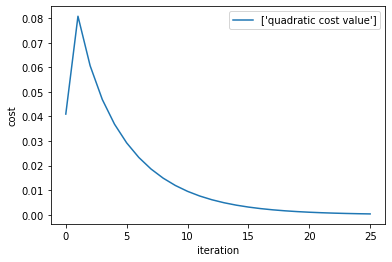

None

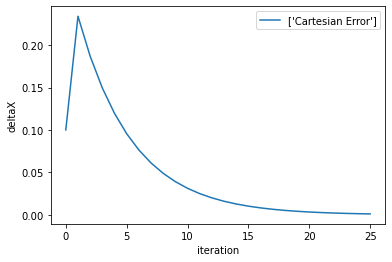

None

converged at iteration 26. Catesian error: 0.0008798673916370972 cost: 0.0003357250553648192
solution:
[[-0.28   0.165 -0.193 -1.481  0.151  1.279 -0.504]]


In [4]:
def teleop_inverse_kinematics():
    # params
    alpha = 0.2 # learning rate
    max_iteration = 100 
    min_deltaX = 1e-3 # error threshold in Cartesian space between current pose of the end-effector and the target

    np.set_printoptions(precision=3, suppress=True)

    builder = DiagramBuilder()

    plant, scene_graph = AddMultibodyPlantSceneGraph(builder, time_step=0.001)
    iiwa = AddIiwa(plant)
    wsg = AddWsg(plant, iiwa, welded=True)
    plant.Finalize()

    visualizer = MeshcatVisualizer.AddToBuilder(
        builder,
        scene_graph,
        meshcat,
        MeshcatVisualizerParams(delete_prefix_initialization_event=False),
    )

    diagram = builder.Build()
    context = diagram.CreateDefaultContext()
    plant_context = plant.GetMyContextFromRoot(context)

    q0 = plant.GetPositions(plant_context)
    gripper_frame = plant.GetFrameByName("body", wsg)
    base_frame = plant.GetBodyByName("iiwa_link_0").body_frame()

    def my_callback(context, pose):
    
        # target pose
        p_target = pose.translation()
        quat_target = R.from_matrix(pose.rotation().matrix()).as_quat()

        # initial state
        q_current = q0
        it = 0

        costs = []
        errors = [] # Cartesian error
        while it < max_iteration:
            # forward kineamtics. get gripper frame
            transform = gripper_frame.CalcPoseInWorld(plant_context)
            quat_current = R.from_matrix(transform.rotation().matrix()).as_quat()
            p_current = transform.translation()

            # check error between current pose of the end-effector and the target pose
            deltaX = calcDeltaX(p_current, quat_current, p_target, quat_target)
            error = np.linalg.norm(deltaX)
            if error < min_deltaX:
                break

            # calc jacobain
            J = plant.CalcJacobianSpatialVelocity(
                context=plant_context, 
                with_respect_to=JacobianWrtVariable.kQDot,
                frame_B=gripper_frame, 
                p_BoBp_B=np.zeros(3),
                frame_A=plant.world_frame(),
                frame_E=plant.world_frame()
            )
            
            # calculate the next joint values by gradient descent equation
            q_current = q_current.reshape(7,1)
            q_next = q_current + alpha * np.linalg.pinv(J) @ deltaX.reshape(6,1)

            # update the robot in the scene
            plant.SetPositions(plant_context, q_next)

            cost = calcCost(q_current, q_next)
            costs.append(cost)

            errors.append(error)

            q_current = q_next
            it += 1

        plt.figure()
        plt.plot(range(it), costs, label=["quadratic cost value"])
        plt.xlabel("iteration")
        plt.ylabel("cost")
        plt.legend()
        display(plt.show())

        plt.figure()
        plt.plot(range(it), errors, label=["Cartesian Error"])
        plt.xlabel("iteration")
        plt.ylabel("deltaX")
        plt.legend()
        display(plt.show())

        if it == max_iteration:
            print('did not converge in {} iterations. Cost is at: {}'.format(max_iteration, cost))
        else:
            print('converged at iteration {}. Catesian error: {} cost: {}'.format(it, error, cost))
            print('solution:\n{}'.format(q_current.T))
        clear_output(wait=True)

    meshcat.DeleteAddedControls()
    sliders = _MeshcatPoseSliders(meshcat)
    sliders.SetPose(
        plant.EvalBodyPoseInWorld(plant_context, plant.GetBodyByName("body", wsg))
    )
    sliders.Run(visualizer, context, my_callback)


teleop_inverse_kinematics()

### GBO 1, 2, 3. Second Approach. 
Min distance in Cartesian space for objective function.     

Forward kinematics:         
$x = F(\theta)$             
$\Delta x = x_{target} - F(\theta)$             


Optimization problem:               
$min \space {1\over2}\Delta x^T\Delta x$    

No inverse matrix needed, its a simpler computatoin but needs many iterations to converge. The reason is that it does not aim at find the shortest path in C-space neccesarily. Cost function does not inforce that.        

The gradient descent basically looks like:              
$\theta_{k+1} = \theta_{k} + \alpha J^T \Delta x$        

To check if the gradient of a functino is correct, we can use finite difference approximation:      
<img src="./share/finit_diff_jac.png" width=600>        
$h$ is the increment; the smaller, the more accurate approximation.

In [3]:
def calcCost(deltaX):
    return 1/2*np.linalg.norm(deltaX)


def calcDeltaX(p_current, quat_current, p_target, quat_target) -> np.ndarray:
    '''
    Calculates error in Cartesian space

    Arguments:
        x: current pose.
        y: target pose

    Returns:
        difference in pose
    '''

    # position current to target
    position_error = p_target - p_current
    
    # Rc, Rtarget,. Rc * Rct = Rt => Rct = Rt * Rc^-1
    # quaternion current to target
    r_current_inv = R.from_quat(quat_current).inv()
    rct = R.from_quat(quat_target) * r_current_inv
    r_error = rct.as_rotvec() # angle * axis

    out = np.zeros(6)
    out[:3] = r_error
    out[3:] = position_error
    return out

def checkJac(J, plant, plant_context, body):
    '''use finite difference approximation to check if given Jacobian is correct'''

    def getFK(plant_context, q_current, q_next):
        plant.SetPositions(plant_context, q_next)
        frame = plant.GetFrameByName("body", body)
        transform = frame.CalcPoseInWorld(plant_context)
        quat1 = R.from_matrix(transform.rotation().matrix())
        p1 = transform.translation()

        # revert back the plant to what it was
        plant.SetPositions(plant_context, q_current)
        return p1, quat1
    
    q_current = plant.GetPositions(plant_context)
    frame = plant.GetFrameByName("body", body)
    transform = frame.CalcPoseInWorld(plant_context)
    quat_current = R.from_matrix(transform.rotation().matrix())
    p_current = transform.translation()

    h = 0.01
    num_joints = J.shape[1]
    J_apprx = np.zeros(J.shape)
    for ix in range(num_joints):
        q_next = deepcopy(q_current)
        q_next[ix] = q_next[ix] + h

        p_next, quat_next = getFK(plant_context, q_current, q_next)

        qcn = quat_next * quat_current.inv()
        quat_delta = qcn.as_rotvec()

        p_delta = p_next - p_current

        # fill column of the Jacobian:
        J_apprx[:3,ix] = quat_delta
        J_apprx[3:,ix] = p_delta
    
    J_apprx = J_apprx/h
    np.set_printoptions(precision=1)
    print(np.sum(J-J_apprx))

In [4]:
def teleop_inverse_kinematics():
    # params
    alpha = 0.2
    max_iteration = 800
    min_deltaX = 1e-3

    builder = DiagramBuilder()

    plant, scene_graph = AddMultibodyPlantSceneGraph(builder, time_step=0.001)
    iiwa = AddIiwa(plant)
    wsg = AddWsg(plant, iiwa, welded=True)
    plant.Finalize()

    visualizer = MeshcatVisualizer.AddToBuilder(
        builder,
        scene_graph,
        meshcat,
        MeshcatVisualizerParams(delete_prefix_initialization_event=False),
    )

    diagram = builder.Build()
    context = diagram.CreateDefaultContext()
    plant_context = plant.GetMyContextFromRoot(context)

    q0 = plant.GetPositions(plant_context)
    gripper_frame = plant.GetFrameByName("body", wsg)
    base_frame = plant.GetBodyByName("iiwa_link_0").body_frame()
    # Frame.CalcPoseInWorld().translation()

    def my_callback(context, pose):
    
        # target pose
        p_target = pose.translation()
        quat_target = R.from_matrix(pose.rotation().matrix()).as_quat()

        # initial state
        q_current = q0
        it = 0

        costs = [] # Cartesian Error
        while it < max_iteration:
            # forward kineamtics. get gripper frame
            transform = gripper_frame.CalcPoseInWorld(plant_context)
            quat_current = R.from_matrix(transform.rotation().matrix()).as_quat()
            p_current = transform.translation()

            # check error between current pose of the end-effector and the target pose
            deltaX = calcDeltaX(p_current, quat_current, p_target, quat_target)
            cost = calcCost(deltaX)

            if cost < min_deltaX:
                break

            # calc jacobain
            J = plant.CalcJacobianSpatialVelocity(
                context=plant_context, 
                with_respect_to=JacobianWrtVariable.kQDot,
                frame_B=gripper_frame, 
                p_BoBp_B=np.zeros(3),
                frame_A=plant.world_frame(),
                frame_E=plant.world_frame()
            )
            
            checkJac(J, plant, plant_context, wsg)
            return
            # calculate the next joint values by gradient descent equation
            q_current = q_current.reshape(7,1)
            q_next = q_current + alpha * J.T @ deltaX.reshape(6,1)

            # update the robot in the scene
            plant.SetPositions(plant_context, q_next)

            costs.append(cost)

            q_current = q_next
            it += 1

        plt.figure()
        plt.plot(range(it), costs, label=["quadratic cost value"])
        plt.xlabel("iteration")
        plt.ylabel("cost")
        plt.legend()
        display(plt.show())

        if it == max_iteration:
            print('did not converge in {} iterations. Cost is at: {}'.format(max_iteration, cost))
        else:
            print('converged at iteration {}. Cost: {}'.format(it, cost))
            print('solution:\n{}'.format(q_current.T))
        clear_output(wait=True)

    meshcat.DeleteAddedControls()
    sliders = _MeshcatPoseSliders(meshcat)
    sliders.SetPose(
        plant.EvalBodyPoseInWorld(plant_context, plant.GetBodyByName("body", wsg))
    )
    sliders.Run(visualizer, context, my_callback)


teleop_inverse_kinematics()

Keyboard Controls:
roll : KeyQ / KeyE
pitch : KeyW / KeyS
yaw : KeyA / KeyD
x : KeyJ / KeyL
y : KeyI / KeyK
z : KeyO / KeyU
Press the 'Stop PoseSliders' button in Meshcat to continue.
0.008911041276842517


### GBO 5: Dual manipulators
Min distance in Cartesian space between the two end-effector for objective function. We do not have to have the orientatio no of the end-effector of the two robots match. We may want the direciont of the gripper to be parallel for example instead of having the whole orientation matching. There is a fixed  transform between the two end-effector in the error function.

[For the math, look at dual.png](./dual_manip.pdf)


In [3]:
def calcCost(deltaX):
    return 1/2*np.linalg.norm(deltaX)

def calcDeltaX(p_current, quat_current, p_target, quat_target) -> np.ndarray:
    '''
    Calculates error in Cartesian space

    Arguments:
        x: current pose.
        y: target pose

    Returns:
        difference in pose
    '''

    # position current to target
    position_error = p_target - p_current
    
    # creat transformation to make the angles facing each other. Rotate around z then, you have y-axis 
    # facing which means the grippers are facing
    angle = np.pi
    axis = np.array([0,0,1])
    quat = np.zeros(4)
    quat[:3] = axis * np.sin(angle/2) # qx,qy,qz,qw
    quat[3] = np.cos(angle/2)
    rot = R.from_quat(quat)
    quat_target = R.from_quat(quat_target)
    quat_target = (quat_target * rot).as_quat()

    # Rc, Rtarget,. Rc * Rct = Rt => Rct = Rt * Rc^-1
    # quaternion current to target
    r_current_inv = R.from_quat(quat_current).inv()
    rct = R.from_quat(quat_target) * r_current_inv
    r_error = rct.as_rotvec() # angle * axis

    out = np.zeros(6)
    out[:3] = r_error # now this rotaion error here contains the fixed transformation to have the grippers facing each other
    out[3:] = position_error
    return out

def AddIiwaAt(plant, q0, base_location=[0,0,0], model_instance_name="iiwa_7"):
    parser = Parser(plant)
    iiwa = parser.AddModelsFromUrl(
        f"package://drake_models/iiwa_description/sdf/iiwa7_no_collision.sdf"
    )[0]
    plant.RenameModelInstance(iiwa, model_instance_name)

    plant.WeldFrames(plant.world_frame(), 
                    plant.GetFrameByName("iiwa_link_0", iiwa), 
                    RigidTransform(base_location)
                )

    # Set default positions:
    index = 0
    for joint_index in plant.GetJointIndices(iiwa):
        joint = plant.get_mutable_joint(joint_index)
        if isinstance(joint, RevoluteJoint):
            joint.set_default_angle(q0[index])
            index += 1

    return iiwa

def AddWsgWithName(plant, iiwa_model_instance, 
                roll=np.pi / 2.0, welded=False, sphere=False, name='gripper'):
    parser = Parser(plant)
    ConfigureParser(parser)
    if welded:
        if sphere:
            file = "package://manipulation/schunk_wsg_50_welded_fingers_sphere.sdf"
        else:
            file = "package://manipulation/schunk_wsg_50_welded_fingers.sdf"
    else:
        file = (
            "package://drake_models/wsg_50_description/sdf/schunk_wsg_50_with_tip.sdf"
        )

    directives = f"""
directives:
- add_model:
    name: gripper
    file: {file}
"""
    gripper = parser.AddModelsFromString(directives, ".dmd.yaml")[0]
    plant.RenameModelInstance(gripper, name)


    X_7G = RigidTransform(RollPitchYaw(np.pi / 2.0, 0, roll), [0, 0, 0.09])
    plant.WeldFrames(
        plant.GetFrameByName("iiwa_link_7", iiwa_model_instance),
        plant.GetFrameByName("body", gripper),
        X_7G,
    )
    return gripper

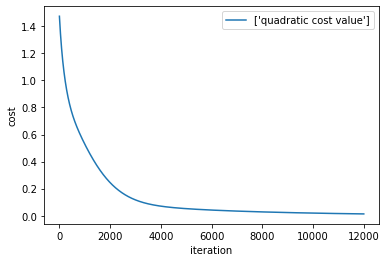

None

did not converge in 12000 iterations. Cost is at: 0.013131934177912747


In [4]:
def teleop_inverse_kinematics():
    meshcat.Delete()
    meshcat.DeleteAddedControls()

    # params
    alpha = 0.001
    max_iteration = 12000
    min_deltaX = 1e-3

    builder = DiagramBuilder()

    plant, scene_graph = AddMultibodyPlantSceneGraph(builder, time_step=0.001)

    q0_1 = [0.8, 0.1, 0, -0.8, 0, 1.0, 0]    
    iiwa_1 = AddIiwaAt(plant, q0_1, [0.0, 0.5, 0.0], "kuka1")
    wsg_1 = AddWsgWithName(plant, iiwa_1, welded=True, name="gripper1")

    q0_2 = [0.1, 0.4, 0, -1.2, 0, 1.0, 0]    
    iiwa_2 = AddIiwaAt(plant, q0_2, [0.0, -0.5, 0.0], "kuka2")
    wsg_2 = AddWsgWithName(plant, iiwa_2, welded=True, name="gripper2")

    plant.Finalize()

    visualizer = MeshcatVisualizer.AddToBuilder(
        builder,
        scene_graph,
        meshcat,
        MeshcatVisualizerParams(delete_prefix_initialization_event=False),
    )
    # sliders = builder.AddSystem(JointSliders(meshcat, plant))

    diagram = builder.Build()
    context = diagram.CreateDefaultContext()
    plant_context = plant.GetMyContextFromRoot(context)
    
    q0_1 = plant.GetPositions(plant_context, iiwa_1)
    gripper_frame_1 = plant.GetFrameByName("body", wsg_1)
    base_frame_1 = plant.GetBodyByName("iiwa_link_0", iiwa_1).body_frame()

    q0_2 = plant.GetPositions(plant_context, iiwa_2)
    gripper_frame_2 = plant.GetFrameByName("body", wsg_2)
    base_frame_2 = plant.GetBodyByName("iiwa_link_0", iiwa_2).body_frame()

    # to show the robots at their inital configurations    
    diagram.ForcedPublish(context)
    time.sleep(3)

    # initial state
    q_current = np.zeros(14)
    q_current[:7] = q0_1
    q_current[7:] = q0_2
    q_current.reshape(14,1)

    it = 0

    costs = [] # Cartesian Error
    while it < max_iteration:
        # forward kineamtics. get gripper frame
        transform_1 = gripper_frame_1.CalcPoseInWorld(plant_context)
        quat_current_1 = R.from_matrix(transform_1.rotation().matrix()).as_quat()
        p_current_1 = transform_1.translation()

        transform_2 = gripper_frame_2.CalcPoseInWorld(plant_context)
        quat_current_2 = R.from_matrix(transform_2.rotation().matrix()).as_quat()
        p_current_2 = transform_2.translation()

        # check error between current pose of the end-effector and the target pose
        deltaX = calcDeltaX(p_current_1, quat_current_1, p_current_2, quat_current_2)
        # deltaX = deltaX[3:] # we must care only about the position
        cost = calcCost(deltaX)

        if cost < min_deltaX:
            break

        # calc jacobain
        J1 = plant.CalcJacobianSpatialVelocity(
            context=plant_context, 
            with_respect_to=JacobianWrtVariable.kQDot,
            frame_B=gripper_frame_1, 
            p_BoBp_B=np.zeros(3),
            frame_A=plant.world_frame(),
            frame_E=plant.world_frame()
        )
        # print(J1.shape)
        np.set_printoptions(precision=3, suppress=True)
        # print(J1)
        J2 = plant.CalcJacobianSpatialVelocity(
            context=plant_context, 
            with_respect_to=JacobianWrtVariable.kQDot,
            frame_B=gripper_frame_2, 
            p_BoBp_B=np.zeros(3),
            frame_A=plant.world_frame(),
            frame_E=plant.world_frame()
        )
        # print(J2)
            
        # calculate the next joint values by gradient descent equation
        J = J1 - J2
        # J = J[3:,:]
        q_next = q_current.reshape(14,1) + alpha * J.T  @ deltaX.reshape(6,1) # J.T, np.linalg.pinv(J)

        # update the robot in the scene
        plant.SetPositions(plant_context, q_next)
        diagram.ForcedPublish(context)

        costs.append(cost)

        q_current = q_next
        it += 1
        
    
    plt.figure()
    plt.plot(range(it), costs, label=["quadratic cost value"])
    plt.xlabel("iteration")
    plt.ylabel("cost")
    plt.legend()
    display(plt.show())

    if it == max_iteration:
        print('did not converge in {} iterations. Cost is at: {}'.format(max_iteration, cost))
    else:
        print('converged at iteration {}. Cost: {}'.format(it, cost))
        print('solution:\n{}'.format(q_current.T))
    clear_output(wait=True)

    diagram.ForcedPublish(context)

teleop_inverse_kinematics()